# Comparison Analysis of Online Streaming Platforms

The dataset is gained through scraping the contents on reelgood.com from July, 20, 2020 to July 21, 2020

# 1. Preprocessing

### 1.1 Read the Dataset and Reorder the Columns

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("./streamingsites/streamingsites2.csv")

In [2]:
col_order = ["web_name","movie_or_tv", "title", "year_start", "year_end",\
             "seasons", "imdb_score", "rg_score", "rated", "genres"]
data = data[col_order]

In [3]:
print(data.shape)
data.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,netflix,show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"animation,action-and-adventure,comedy,drama,fa..."
1,netflix,movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"comedy,independent,drama"
2,netflix,show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),comedy
3,netflix,show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"documentary,sport"
4,netflix,movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"comedy,drama,romance"


### 1.2 Changing the data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27305 entries, 0 to 27304
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   web_name     27305 non-null  object 
 1   movie_or_tv  27305 non-null  object 
 2   title        27305 non-null  object 
 3   year_start   27305 non-null  int64  
 4   year_end     6147 non-null   float64
 5   seasons      6147 non-null   float64
 6   imdb_score   25242 non-null  float64
 7   rg_score     26708 non-null  float64
 8   rated        13156 non-null  object 
 9   genres       25495 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [5]:
data.loc[data['year_end'].notnull(), 'year_end'] = data.loc[data['year_end'].notnull(), 'year_end'].astype('int64')
data.loc[data['seasons'].notnull(), 'seasons'] = data.loc[data['seasons'].notnull(), 'seasons'].apply('int64')
data.loc[data['rg_score'].notnull(), 'rg_score'] = data.loc[data['rg_score'].notnull(), 'rg_score'].apply('int64')

### 1.3 Rename the unique genres and change from string to list

In [6]:
data['genres'] = data['genres'].astype(str)
genres = list(map(lambda x: x.split(','), data['genres'].tolist()))
unique_genres = list(set([genre for row in genres for genre in row]))
sorted(unique_genres)

['action & adventure',
 'action-and-adventure',
 'animation',
 'anime',
 'biography',
 'children',
 'comedy',
 'crime',
 'cult',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'food',
 'game show',
 'game-show',
 'history',
 'home & garden',
 'home-and-garden',
 'horror',
 'independent',
 'lgbtq',
 'musical',
 'mystery',
 'nan',
 'reality',
 'romance',
 'science-fiction',
 'sport',
 'stand-up & talk',
 'stand-up-and-talk',
 'thriller',
 'travel']

In [7]:
data['genres'] = data['genres'].str.replace('action-and-adventure','action and adventure')
data['genres'] = data['genres'].str.replace('action & adventure','action and adventure')
data['genres'] = data['genres'].str.replace('game-show','game show')
data['genres'] = data['genres'].str.replace('home-and-garden','home and garden')
data['genres'] = data['genres'].str.replace('home & garden','home and garden')
data['genres'] = data['genres'].str.replace('stand-up-and-talk','stand-up and talk')
data['genres'] = data['genres'].str.replace('stand-up & talk','stand-up and talk')

In [8]:
# Changing the column of genres from string to lists
data['genres'] = data['genres'].apply(lambda x: x.split(','))

### 1.4 Capitalize the texts

In [9]:
data['web_name'] = list(map(lambda x: x.capitalize(),data['web_name']))
data['movie_or_tv'] = list(map(lambda x: x.capitalize(),data['movie_or_tv']))
data['genres'] = list(map(lambda rows: list(map(lambda x: x.capitalize(), rows)), data['genres']))

### 1.5 Rename web name

In [10]:
data['web_name'] = data['web_name'].str.replace('Hbo_max', "HBO Max")
data['web_name'] = data['web_name'].str.replace('Disney_plus', "Disney Plus")
data['web_name'] = data['web_name'].str.replace('Amazon', "Amazon Prime")

In [11]:
# data.to_csv("preprocesseddata.csv")

# 2. EDA

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")

In [13]:
df = data.copy()
print(df.shape)
df.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"[Animation, Action and adventure, Comedy, Dram..."
1,Netflix,Movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"[Comedy, Independent, Drama]"
2,Netflix,Show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),[Comedy]
3,Netflix,Show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"[Documentary, Sport]"
4,Netflix,Movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"[Comedy, Drama, Romance]"


### Price for each platform

In [14]:
#Price for each platform as of July 20, 2020
membership = pd.DataFrame([["Amazon Prime", 8.99],["Disney Plus", 6.99],\
                           ["HBO Max", 14.99],["Hulu", 11.99],["Netflix", 12.99]], columns = ["web_name", "cost"])
membership

,web_name,cost
0,Amazon Prime,8.99
1,Disney Plus,6.99
2,HBO Max,14.99
3,Hulu,11.99
4,Netflix,12.99


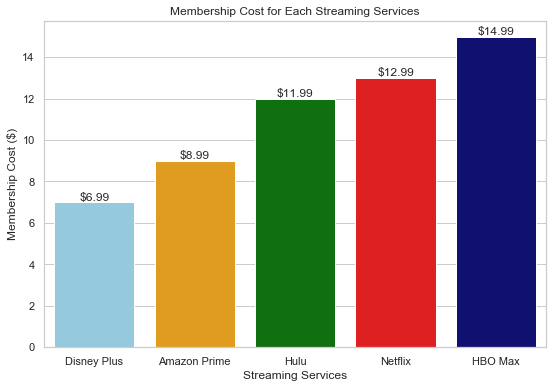

In [15]:
palette = {"Amazon Prime":"orange", "Disney Plus": "skyblue", "HBO Max": "navy", "Hulu": "green", "Netflix":"red"}
ax = sns.barplot(data = membership.sort_values("cost"), x= "web_name", y = "cost", palette = palette)
plt.title("Membership Cost for Each Streaming Services")
plt.xlabel("Streaming Services")
plt.ylabel("Membership Cost ($)")
for p in ax.patches:
    ax.annotate("$%.2f" % p.get_height(), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q1. How many contents are in each streaming service?

In [16]:
df_count = pd.DataFrame(df.groupby(["web_name","movie_or_tv"]).size()).\
            reset_index().rename(columns = {0:"count"})
df_count

,web_name,movie_or_tv,count
0,Amazon Prime,Movie,14067
1,Amazon Prime,Show,2136
2,Disney Plus,Movie,637
3,Disney Plus,Show,203
4,HBO Max,Movie,1747
5,HBO Max,Show,368
6,Hulu,Movie,945
7,Hulu,Show,1713
8,Netflix,Movie,3762
9,Netflix,Show,1727


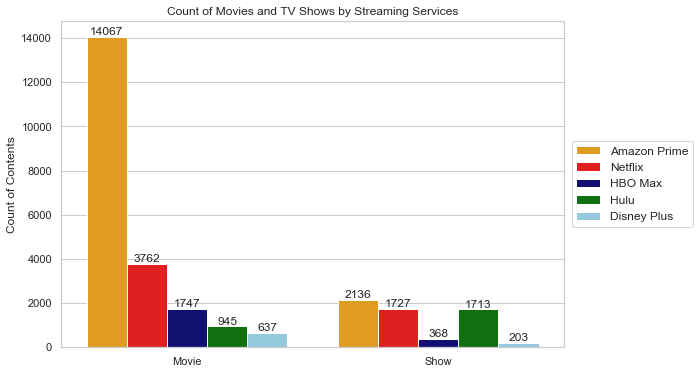

In [17]:
ax = sns.barplot(data =df_count.sort_values("count", ascending = False),\
            x= "movie_or_tv", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Movies and TV Shows by Streaming Services")
plt.xlabel("")
plt.ylabel("Count of Contents")
plt.legend(fontsize = 12, bbox_to_anchor=(1.27,0.65))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q2. How does the distribution of review scores look for each service?

#### With IMDB Score

In [18]:
# Overall average imdb_score of movies and TV shows
df.groupby("movie_or_tv")["imdb_score"].mean()

movie_or_tv
Movie    5.985874
Show     7.143145
Name: imdb_score, dtype: float64

In [19]:
imdb = df.groupby(["web_name","movie_or_tv"])[["imdb_score"]].describe().round(2).iloc[:,1:]
imdb

imdb_score                               
                               mean   std  min  25%  50%  75%  max
web_name     movie_or_tv                                          
Amazon Prime Movie             5.77  1.40  1.0  4.9  5.9  6.8  9.4
             Show              7.14  1.14  1.8  6.6  7.3  8.0  9.5
Disney Plus  Movie             6.49  1.02  1.6  5.9  6.5  7.2  9.0
             Show              6.95  1.14  3.3  6.2  7.0  7.9  9.7
HBO Max      Movie             6.81  1.03  1.7  6.2  7.0  7.6  9.3
             Show              7.49  1.08  2.5  7.1  7.7  8.2  9.4
Hulu         Movie             6.16  1.09  1.6  5.5  6.2  7.0  9.3
             Show              7.06  1.19  1.7  6.6  7.3  7.9  9.4
Netflix      Movie             6.25  1.15  1.6  5.5  6.3  7.1  9.3
             Show              7.16  1.10  1.0  6.6  7.3  7.9  9.5

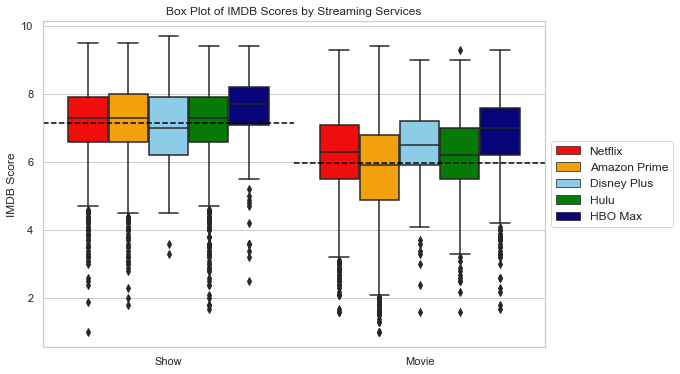

In [20]:
g = sns.boxplot(data = df, x = "movie_or_tv", y = "imdb_score", hue = "web_name", palette = palette, saturation = 0.9)
plt.title("Box Plot of IMDB Scores by Streaming Services")
plt.xlabel("")
plt.ylabel("IMDB Score")
plt.legend(fontsize = 12, bbox_to_anchor=(1,0.65))
g.axhline(5.98, color = "black", linestyle = '--', xmin = 0.5)
g.axhline(7.14, color = "black",linestyle = '--', xmax = 0.5)

#### With Popularity Score from Reelgood.com

The Reelgood Score takes into account audience and critics scores from IMDb and critic sentiment, recent popularity, and other quality markers like genres or cast & crew to help you find what to watch. The higher the score, the better the movie or show.

In [21]:
df.groupby("movie_or_tv")["rg_score"].mean()

movie_or_tv
Movie    46.795371
Show     50.533635
Name: rg_score, dtype: float64

In [22]:
rg_score = df.groupby(["web_name","movie_or_tv"])[["rg_score"]].describe().round(2).iloc[:,1:]
rg_score

rg_score                                      
                             mean    std   min   25%   50%   75%    max
web_name     movie_or_tv                                               
Amazon Prime Movie          41.71  13.92  10.0  33.0  38.0  49.0   97.0
             Show           39.77  20.08  10.0  22.0  41.0  53.0   92.0
Disney Plus  Movie          61.43  16.60  15.0  48.0  60.0  75.0   96.0
             Show           53.74  13.46  10.0  46.0  54.0  62.0   91.0
HBO Max      Movie          61.92  17.74  10.0  49.0  65.0  76.0   97.0
             Show           60.42  17.28  10.0  50.0  63.0  73.0   99.0
Hulu         Movie          59.48  14.75  11.0  48.0  60.0  71.0  100.0
             Show           54.18  18.11  10.0  45.0  56.0  67.0   97.0
Netflix      Movie          52.88  15.09  10.0  42.0  51.0  63.0   98.0
             Show           55.71  16.18  10.0  45.0  55.0  67.0  100.0

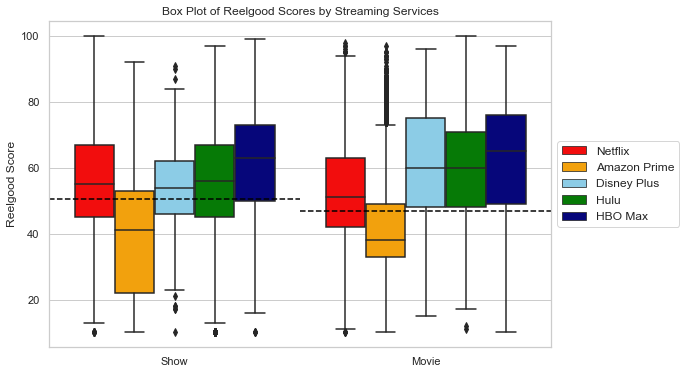

In [23]:
g = sns.boxplot(data = df, x = "movie_or_tv", y = "rg_score", hue = "web_name", palette = palette, saturation = 0.9)
plt.title("Box Plot of Reelgood Scores by Streaming Services")
plt.xlabel("")
plt.ylabel("Reelgood Score")
plt.legend(fontsize= 12, bbox_to_anchor=(1,0.65))
g.axhline(46.79, color = "black", linestyle = '--', xmin = 0.5)
g.axhline(50.53, color = "black",linestyle = '--', xmax = 0.5)

### Q3. What are the proportions for quality and high-quality movies and TV shows?

In [24]:
# Let's say movies or TV shows with above 50% of the imdb_score are considered quality.
# And, anything above the 75% of the imdb_score is considered high quality.
df.groupby("movie_or_tv")["imdb_score"].describe()

,count,mean,std,min,25%,50%,75%,max
movie_or_tv,,,,,,,,
Movie,20275.0,5.985874,1.345793,1.0,5.2,6.2,7.0,9.4
Show,4967.0,7.143145,1.141777,1.0,6.6,7.3,7.9,9.7


In [25]:
# Make the movies and TV shows into two separate dataframes
groups = df.groupby("movie_or_tv")
df_movie = pd.DataFrame(groups).iloc[0,1]
df_tv = pd.DataFrame(groups).iloc[1,1]

In [26]:
# Total, High Quality and Quality Movies
total_movie = df_movie.groupby("web_name").size()
Q_movie = df_movie.loc[df_movie["imdb_score"] >= 6.2,].groupby("web_name").size()
HQ_movie = df_movie.loc[df_movie["imdb_score"] >= 7.0,].groupby("web_name").size()

# Total, High Quality and Quality TV Shows
total_tv = df_tv.groupby("web_name").size()
Q_tv = df_tv.loc[df_tv["imdb_score"] >= 7.3,].groupby("web_name").size()
HQ_tv = df_tv.loc[df_tv["imdb_score"] >= 7.9,].groupby("web_name").size()

### Quality Movies

In [27]:
movies = pd.concat([total_movie, Q_movie, HQ_movie], axis = 1,\
                   keys= ["Total Movies","Quality Movies","High Quality Movies"])
movies = pd.DataFrame(movies.stack()).reset_index().rename(columns = {'level_1':"quality", 0:"count"})
movies

,web_name,quality,count
0,Amazon Prime,Total Movies,14067
1,Amazon Prime,Quality Movies,5912
2,Amazon Prime,High Quality Movies,2847
3,Disney Plus,Total Movies,637
4,Disney Plus,Quality Movies,417
5,Disney Plus,High Quality Movies,217
6,HBO Max,Total Movies,1747
7,HBO Max,Quality Movies,1299
8,HBO Max,High Quality Movies,850
9,Hulu,Total Movies,945


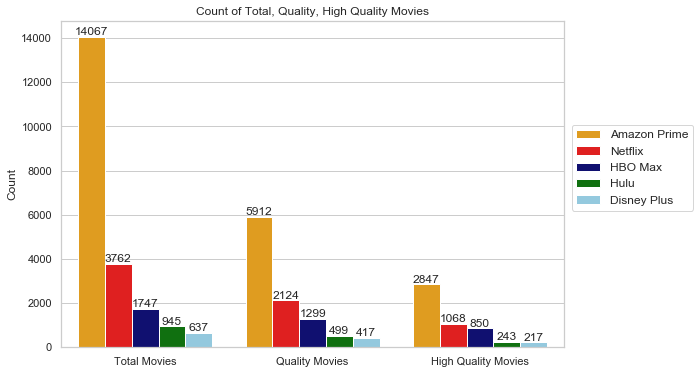

In [28]:
ax = sns.barplot(data = movies.sort_values("count", ascending = False),\
                 x = "quality", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Total, Quality, High Quality Movies")
plt.xlabel("")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1.27,0.7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Quality TV Shows

In [29]:
tvshows = pd.concat([total_tv, Q_tv, HQ_tv], axis = 1,\
                    keys= ["Total TV Shows","Quality TV Shows","High Quality TV Shows"])
tvshows = pd.DataFrame(tvshows.stack()).reset_index().rename(columns = {'level_1':"quality", 0:"count"})
tvshows

,web_name,quality,count
0,Amazon Prime,Total TV Shows,2136
1,Amazon Prime,Quality TV Shows,712
2,Amazon Prime,High Quality TV Shows,380
3,Disney Plus,Total TV Shows,203
4,Disney Plus,Quality TV Shows,78
5,Disney Plus,High Quality TV Shows,51
6,HBO Max,Total TV Shows,368
7,HBO Max,Quality TV Shows,236
8,HBO Max,High Quality TV Shows,157
9,Hulu,Total TV Shows,1713


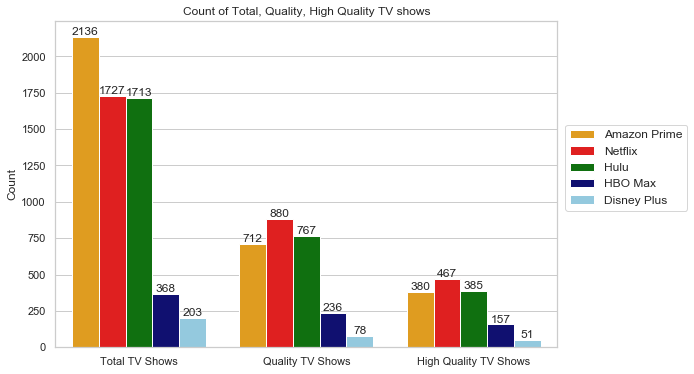

In [30]:
ax = sns.barplot(data = tvshows.sort_values("count", ascending = False),\
                 x = "quality", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Total, Quality, High Quality TV shows")
plt.xlabel("")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1.27,0.7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Breakdown of HQ movies and TV shows by year

In [31]:
year_movie = df_movie.loc[df_movie['imdb_score'] >= 7.0,]
year_movie = pd.DataFrame(year_movie.groupby(["web_name", "year_start"]).size()).\
                reset_index().rename(columns = {0:"count"})
year_tv = df_tv.loc[df_tv['imdb_score'] >= 7.9,]
year_tv = pd.DataFrame(year_tv.groupby(["web_name", "year_start"]).size()).\
                reset_index().rename(columns = {0:"count"})

#### Count of HQ movies by year

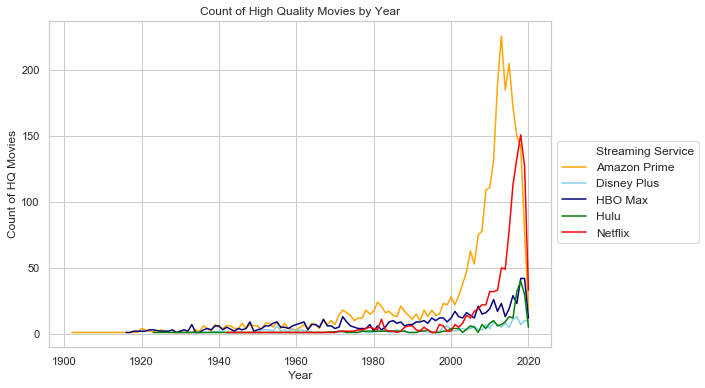

In [32]:
ax = sns.lineplot(data= year_movie, x = "year_start", y = "count", hue = "web_name", palette = palette)
plt.title("Count of High Quality Movies by Year")
plt.xlabel("Year")
plt.ylabel("Count of HQ Movies")
ax.legend(fontsize= 12, bbox_to_anchor=(1,0.65)).texts[0].set_text("Streaming Service")

#### Count of HQ TV series by year

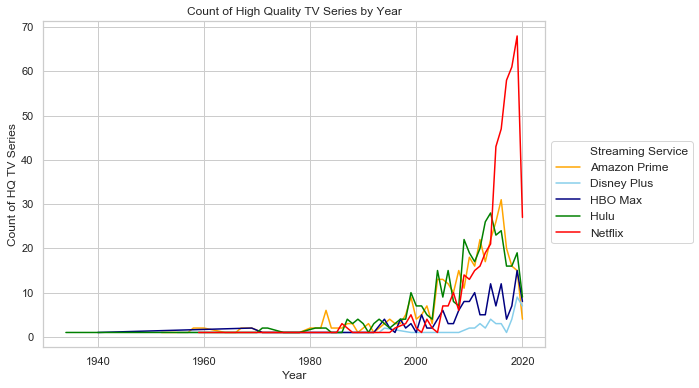

In [33]:
sns.lineplot(data= year_tv, x = "year_start", y = "count",  hue = "web_name", palette = palette)
plt.title("Count of High Quality TV Series by Year")
plt.xlabel("Year")
plt.ylabel("Count of HQ TV Series")
plt.legend(fontsize= 12, bbox_to_anchor=(1,0.65)).texts[0].set_text("Streaming Service")

### Q4. What genres are popular?

In [34]:
df_genre = df.copy()

In [35]:
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genres:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre['genres'] = genre['genres'].apply(lambda x: x.strip("'"))

In [36]:
df_genre = pd.merge(df_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index')
df_genre = df_genre.loc[df_genre["genres"] != "Nan",]
print(df_genre.shape)

(70607, 11)


Text(0, 0.5, 'Count')

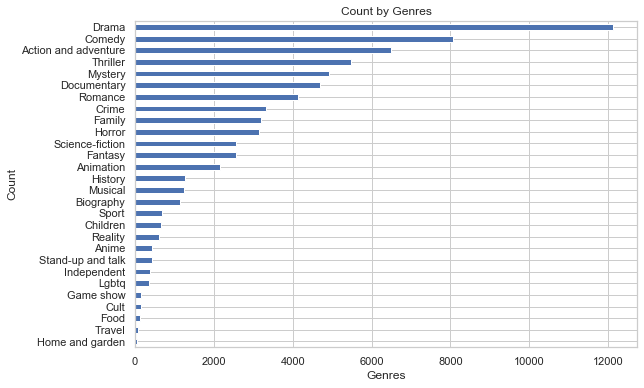

In [37]:
df_genre.groupby('genres').size().sort_values().plot.barh()
plt.title("Count by Genres")
plt.xlabel('Genres')
plt.ylabel('Count')

Text(0, 0.5, 'Averge Imdb Score')

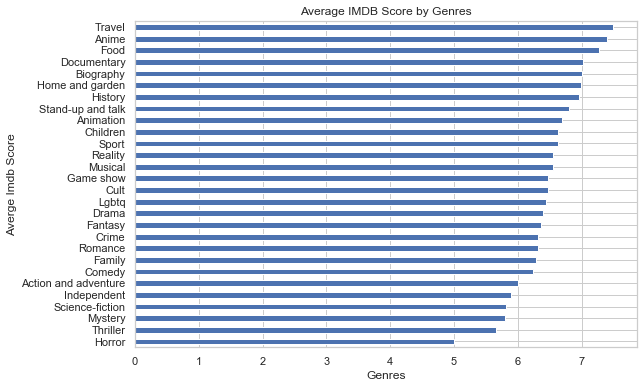

In [38]:
df_genre.groupby('genres')['imdb_score'].mean().sort_values().plot.barh()
plt.title("Average IMDB Score by Genres")
plt.xlabel("Genres")
plt.ylabel('Averge Imdb Score')

### Breakdown of high quality movies and TV shows (in 2000s) by genre

In [39]:
genre_groups = df_genre.groupby("movie_or_tv")
genre_movie = pd.DataFrame(genre_groups).iloc[0,1]
genre_movie = genre_movie.loc[(genre_movie['imdb_score'] >= 7.0) & (genre_movie["year_start"] >= 2000),]
genre_tv = pd.DataFrame(genre_groups).iloc[1,1]
genre_tv = genre_tv.loc[(genre_tv['imdb_score'] >= 7.9) & (genre_tv["year_start"] >= 2000),]
facet_movie = pd.DataFrame(genre_movie.groupby(["web_name", "genres"]).size().round(2)).\
                reset_index().rename(columns = {0:"count"})
facet_tv = pd.DataFrame(genre_tv.groupby(["web_name", "genres"]).size().round(2)).\
                reset_index().rename(columns = {0:"count"})

#### Count of HQ movies by genre

/Users/hb/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


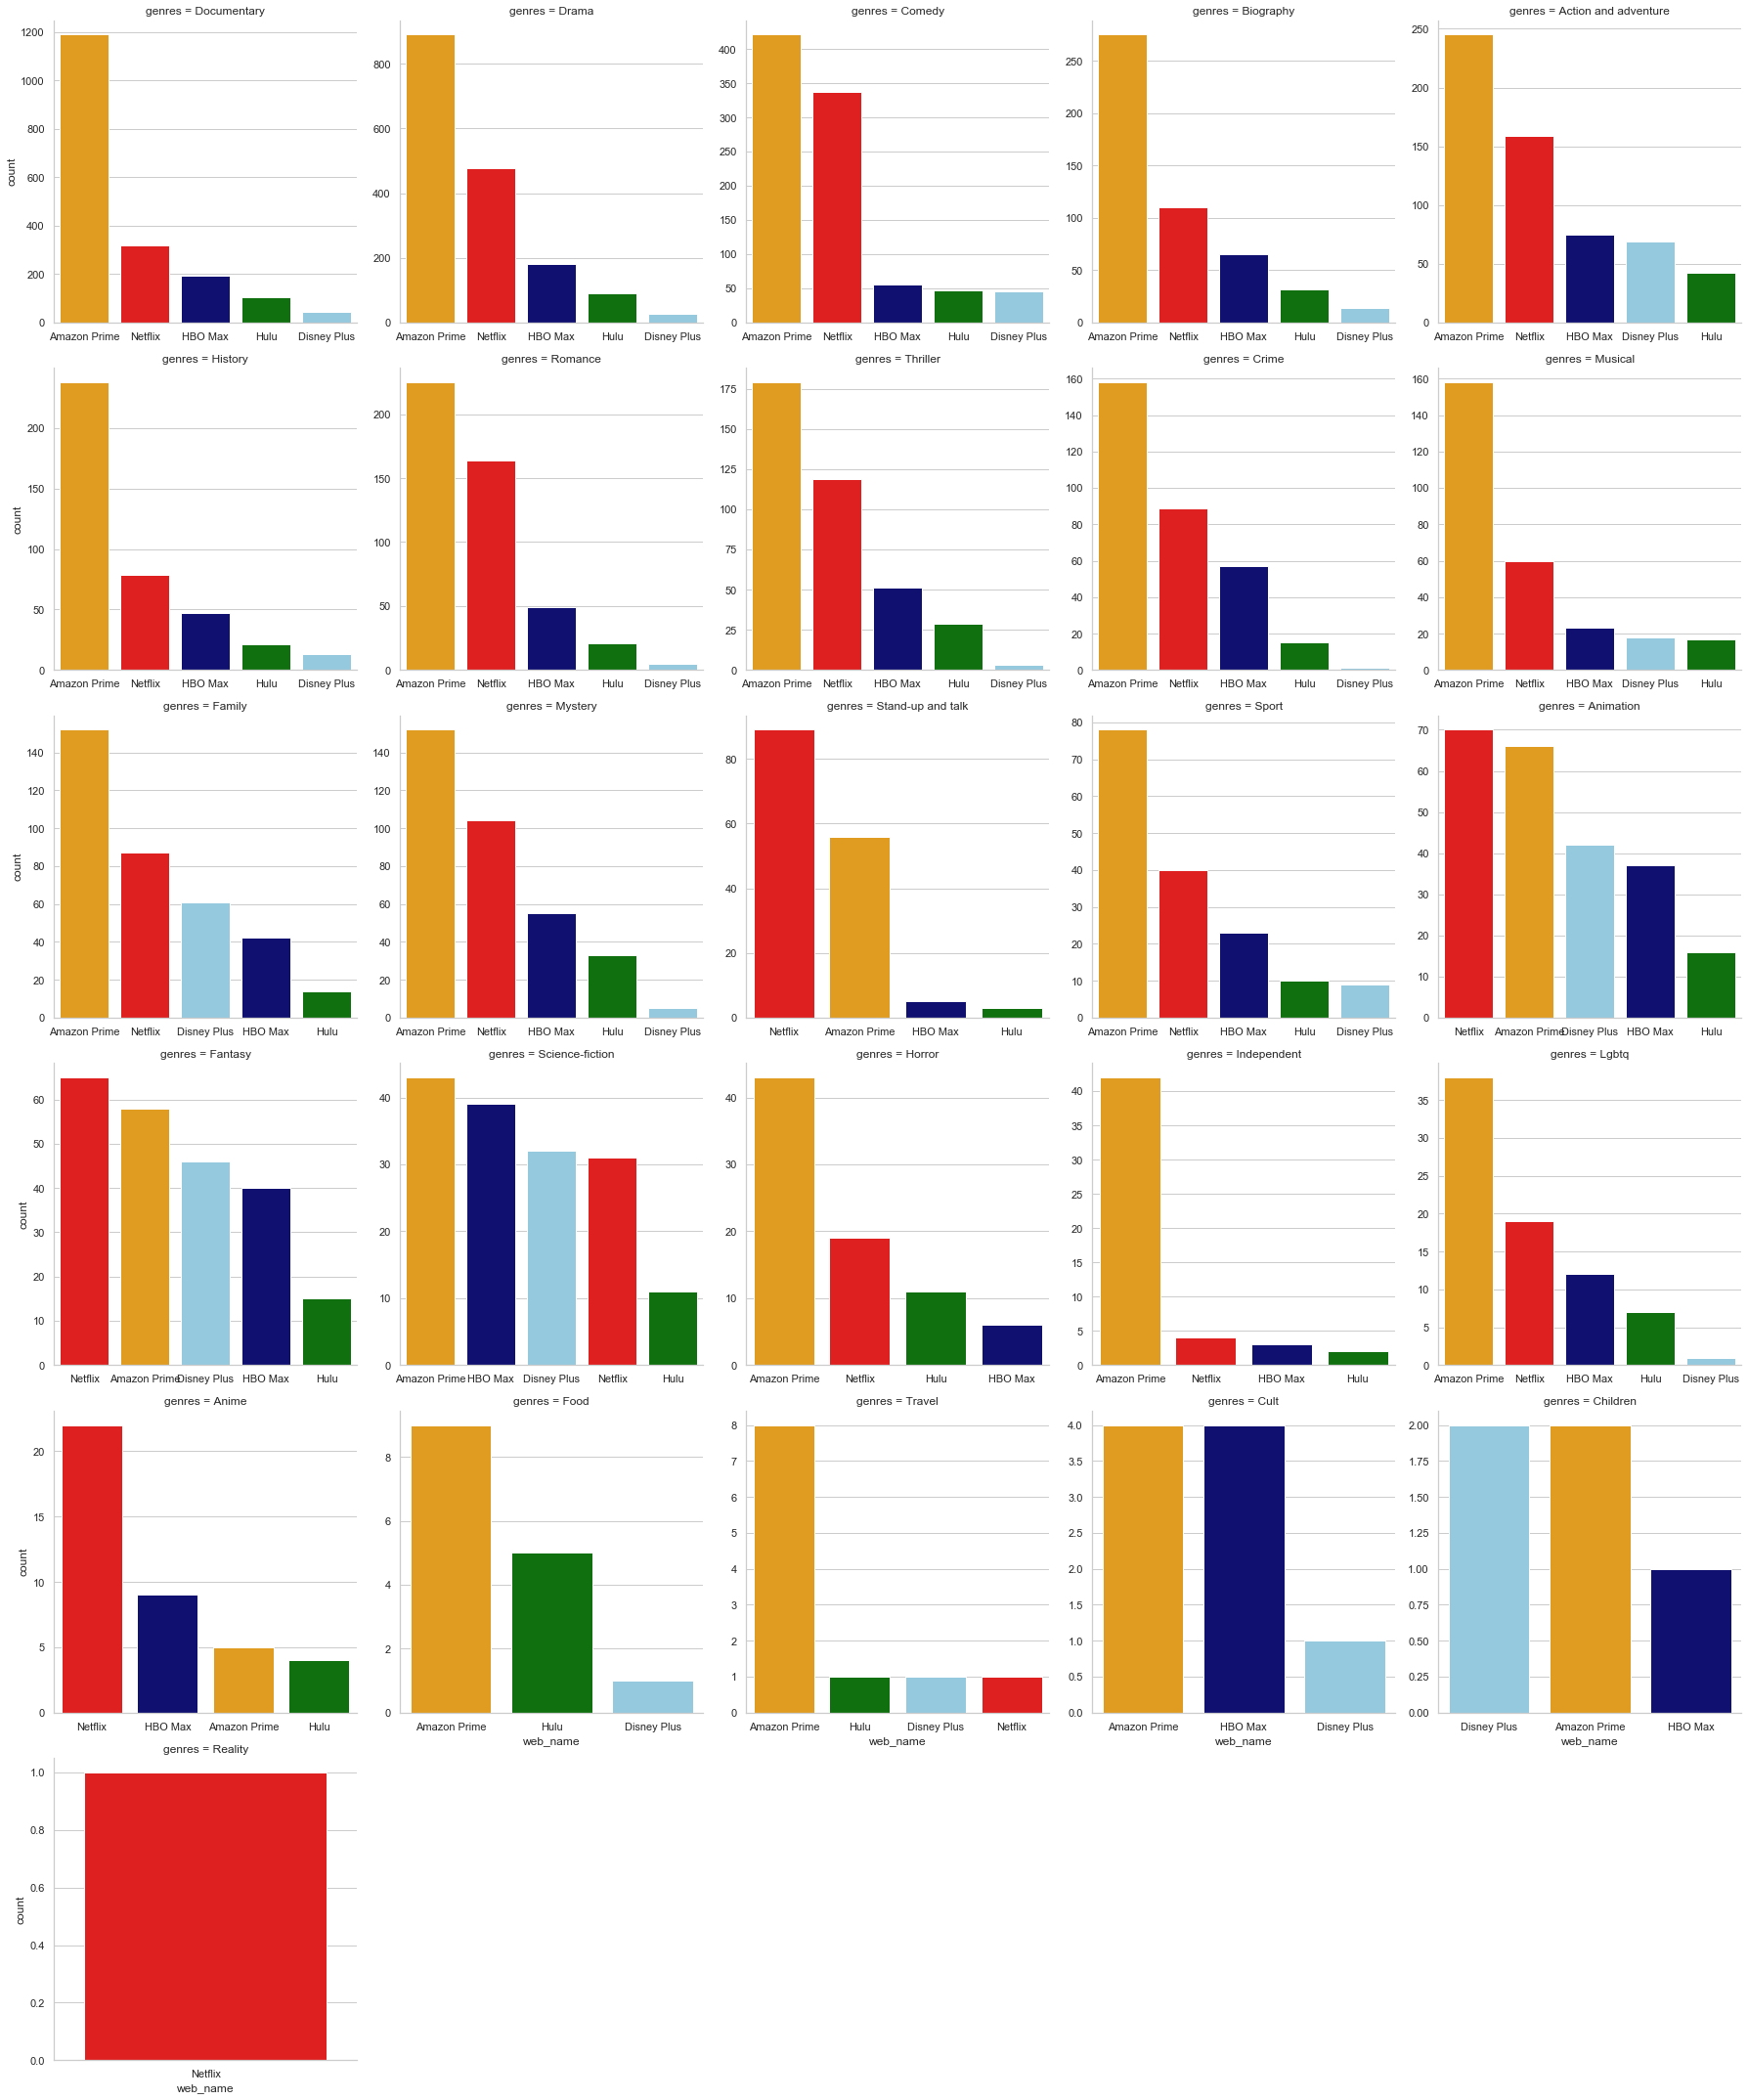

In [40]:
grid = sns.FacetGrid(data = facet_movie.sort_values(by = "count", ascending = False),\
                     col = "genres", col_wrap = 5,sharex = False, sharey = False, height = 5)
grid.map(sns.barplot, "web_name", "count", palette = palette)

#### Count of HQ TV shows by genre

/Users/hb/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


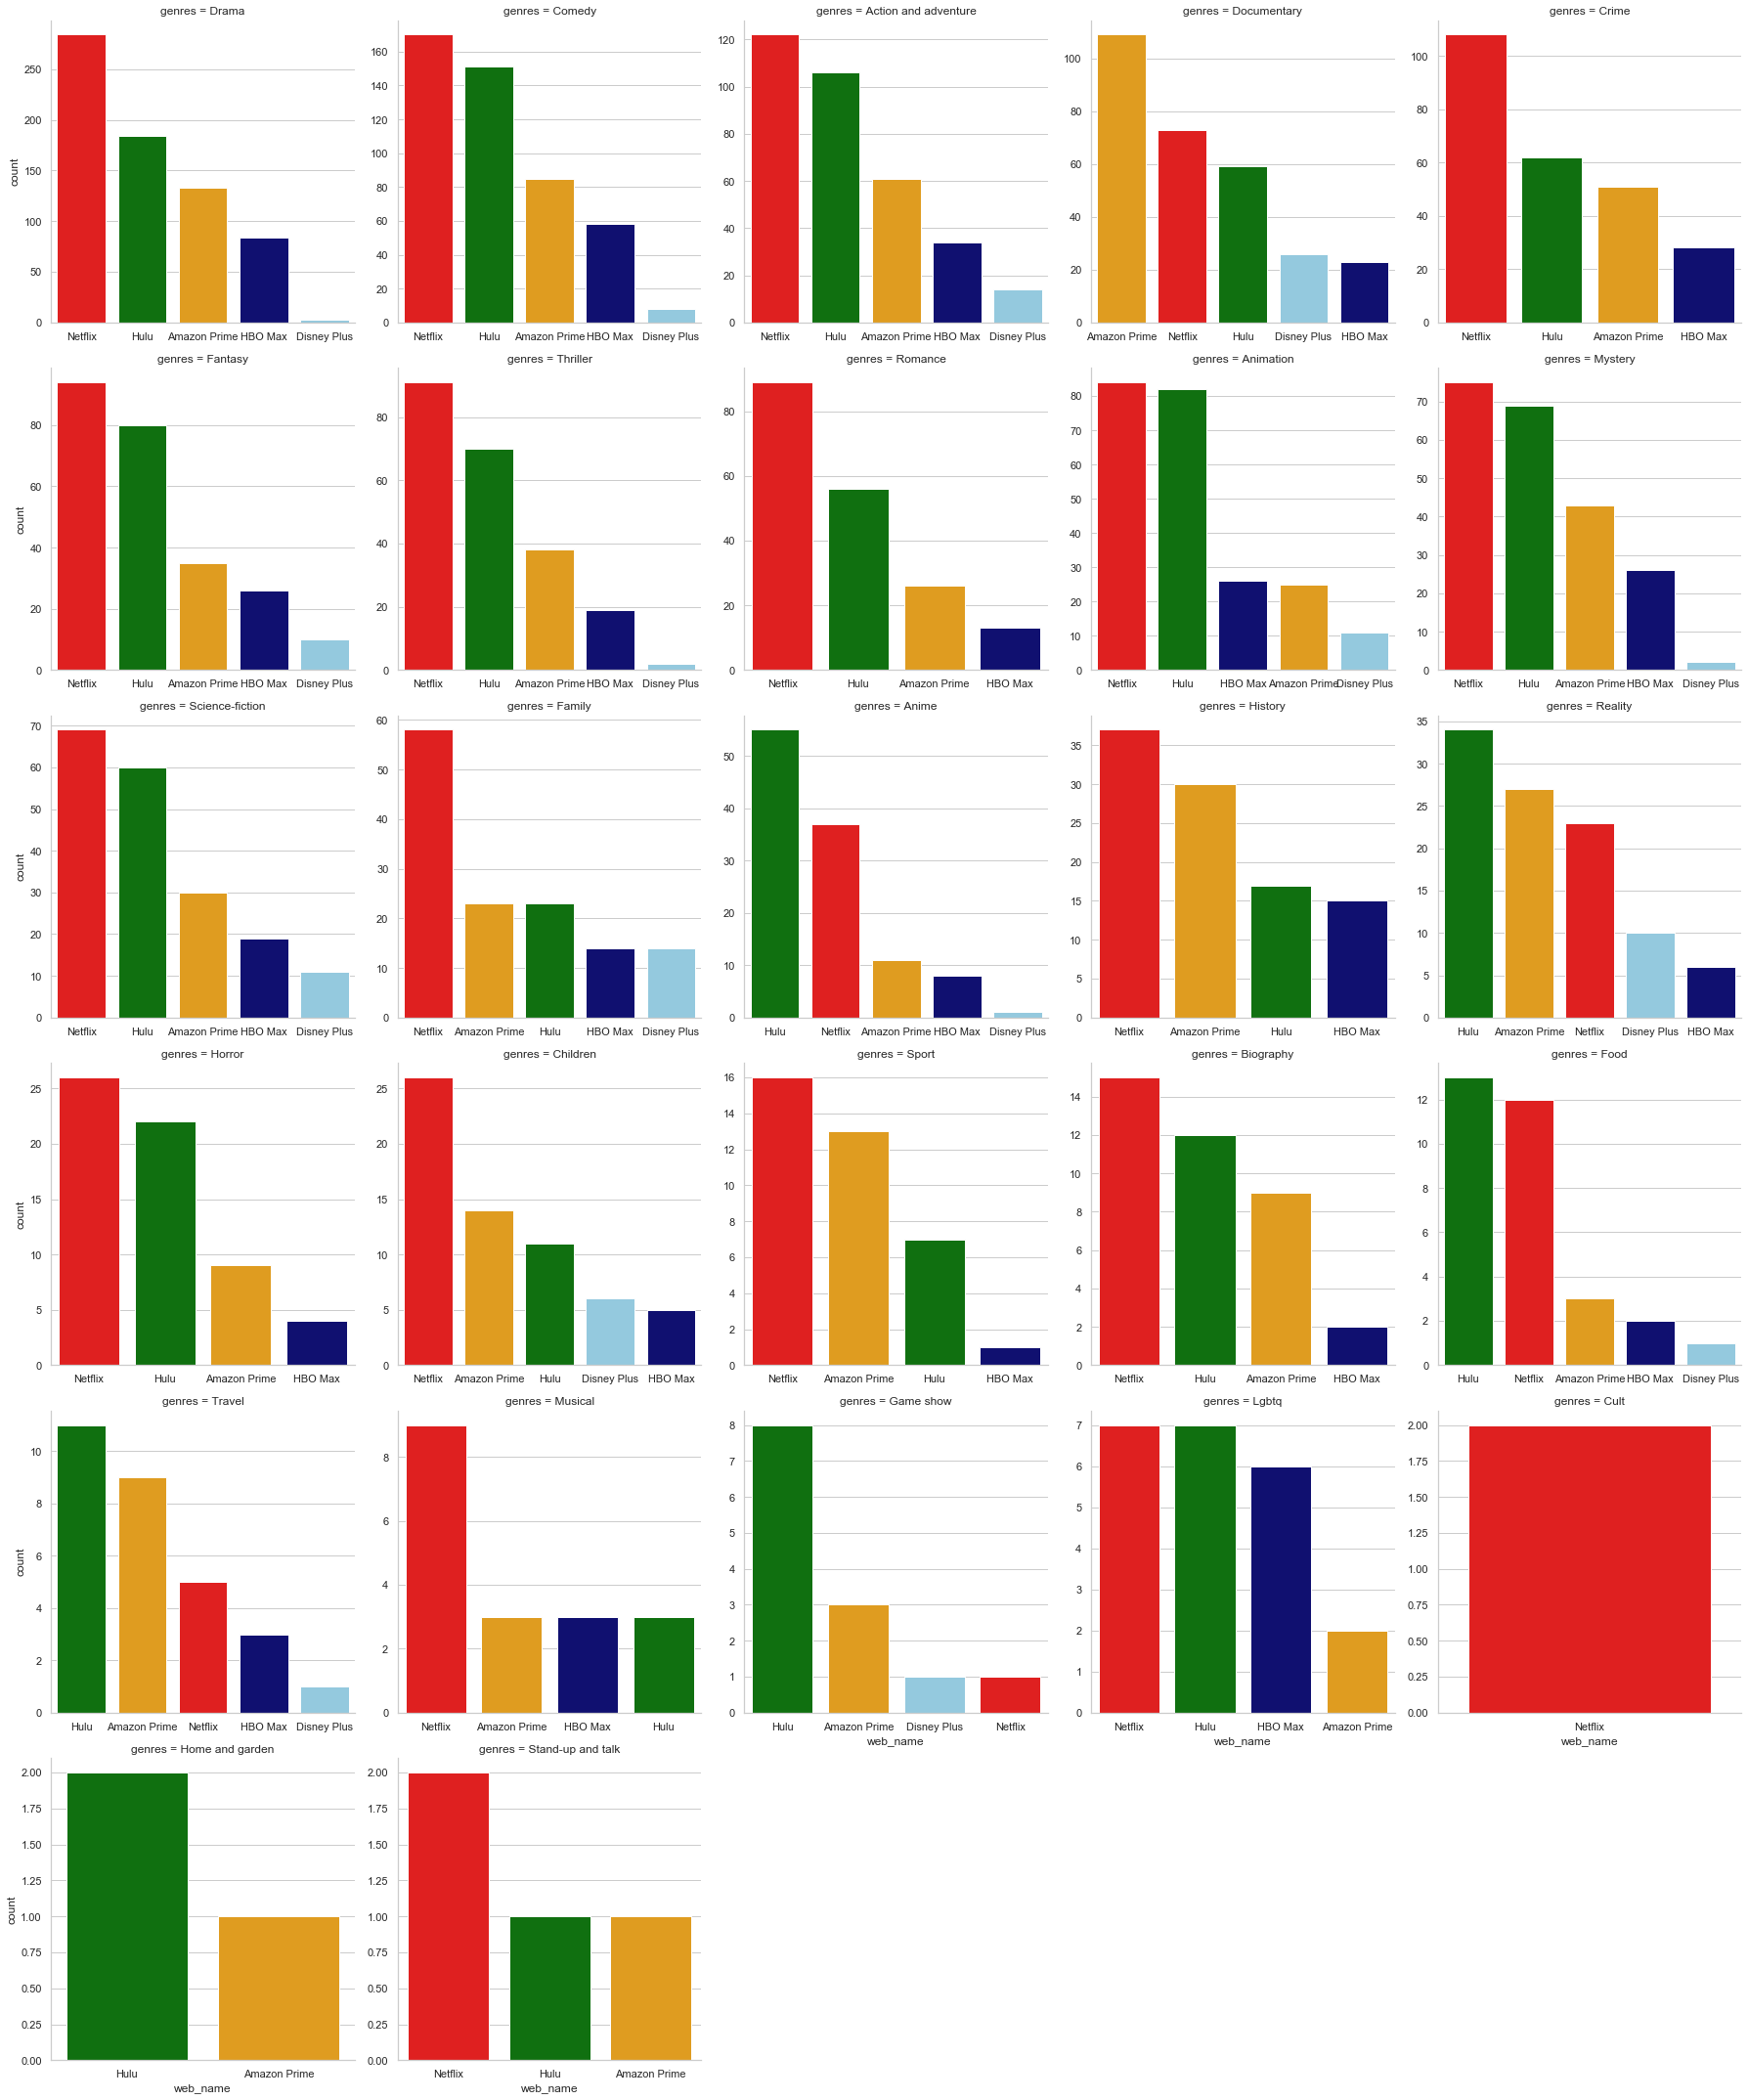

In [41]:
grid = sns.FacetGrid(data = facet_tv.sort_values(by = "count", ascending = False),\
                     col = "genres", col_wrap = 5, sharex = False, sharey = False, height = 5)
grid.map(sns.barplot, "web_name", "count", palette = palette)

### Q5. How many contents can you get for one dollar?

In [42]:
HQ_movie2000 = df_movie.loc[(df_movie["imdb_score"] >= 7.0) &\
                            (df_movie["year_start"] >= 2000),].groupby("web_name").size()
HQ_tv2000 = df_tv.loc[(df_tv["imdb_score"] >= 7.9) & (df_tv["year_start"] >= 2000),].groupby("web_name").size()
HQ2000 =pd.concat([HQ_movie2000,HQ_tv2000], axis = 1, keys = ["HQ Movies","HQ TV Shows"])
HQ2000 = pd.DataFrame(HQ2000.stack()).reset_index().rename(columns = {'level_1':"kind", 0:"count"})

In [43]:
count_cost = HQ2000.merge(membership)
count_cost['perdollar'] = round(count_cost['count'] / count_cost['cost']).astype("int")
count_cost

,web_name,kind,count,cost,perdollar
0,Amazon Prime,HQ Movies,2151,8.99,239
1,Amazon Prime,HQ TV Shows,300,8.99,33
2,Disney Plus,HQ Movies,127,6.99,18
3,Disney Plus,HQ TV Shows,43,6.99,6
4,HBO Max,HQ Movies,413,14.99,28
5,HBO Max,HQ TV Shows,133,14.99,9
6,Hulu,HQ Movies,204,11.99,17
7,Hulu,HQ TV Shows,316,11.99,26
8,Netflix,HQ Movies,959,12.99,74
9,Netflix,HQ TV Shows,442,12.99,34


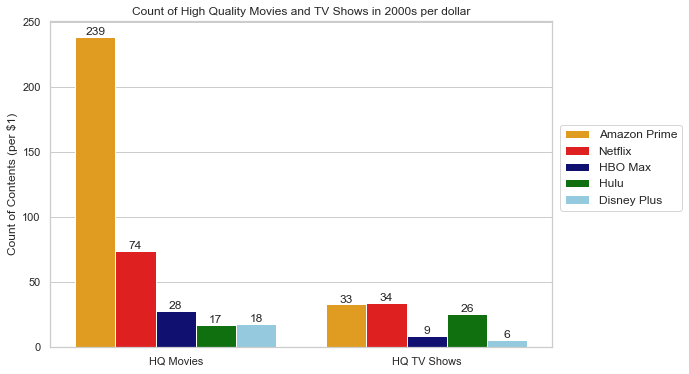

In [47]:
ax = sns.barplot(data= count_cost.sort_values("perdollar", ascending = False),\
                 x = "kind", y = "perdollar", hue = "web_name", palette = palette)
plt.title("Count of High Quality Movies and TV Shows in 2000s per dollar")
plt.xlabel("")
plt.ylabel("Count of Contents (per $1)")
plt.legend(fontsize= 12, bbox_to_anchor=(1.27,0.7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')